In [1]:
from swap_TN_direct import *

import time
import json

/home/asingal/home/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/asingal/home/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


Common parameters and functions

Performing measurements: 

Threshold detection

PNR detection

In [36]:
# params
trunc = 3
N = trunc+1
error_tolerance = 1e-12

mean_photon_num = (0.5)
efficiency = 0.9


num_modes = 8
# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
# psi = new_ls(N, mean_photon_num, error_tolerance) 

idler_angles = np.linspace(0, np.pi, 15)
signal_angles = np.linspace(0, 2*np.pi, 40)

Corresponding Basis terms:
0H0V_D 0H0V_C 0H0V_B 0H0V_A - 0 - [0.78636564-0.j]
0H0V_D 0H0V_C 0H1V_B 0H1V_A - 17 - [-0.+0.36403878j]
0H0V_D 0H0V_C 0H2V_B 0H2V_A - 34 - [-0.16381725-0.j]
0H0V_D 0H0V_C 0H3V_B 0H3V_A - 51 - [0.-0.09292146j]
0H0V_D 0H0V_C 1H0V_B 1H0V_A - 68 - [-0.+0.36403878j]
0H0V_D 0H0V_C 1H1V_B 1H1V_A - 85 - [-0.1685275-0.j]
0H0V_D 0H0V_C 1H2V_B 1H2V_A - 102 - [0.-0.07583728j]
0H0V_D 0H0V_C 1H3V_B 1H3V_A - 119 - [0.0430169-0.j]
0H0V_D 0H0V_C 2H0V_B 2H0V_A - 136 - [-0.16381725-0.j]
0H0V_D 0H0V_C 2H1V_B 2H1V_A - 153 - [0.-0.07583728j]
0H0V_D 0H0V_C 2H2V_B 2H2V_A - 170 - [0.03412673+0.j]
0H0V_D 0H0V_C 2H3V_B 2H3V_A - 187 - [-0.+0.01935758j]
0H0V_D 0H0V_C 3H0V_B 3H0V_A - 204 - [0.-0.09292146j]
0H0V_D 0H0V_C 3H1V_B 3H1V_A - 221 - [0.0430169-0.j]
0H0V_D 0H0V_C 3H2V_B 3H2V_A - 238 - [-0.+0.01935758j]
0H0V_D 0H0V_C 3H3V_B 3H3V_A - 255 - [-0.01098013-0.j]
4.879457712173462


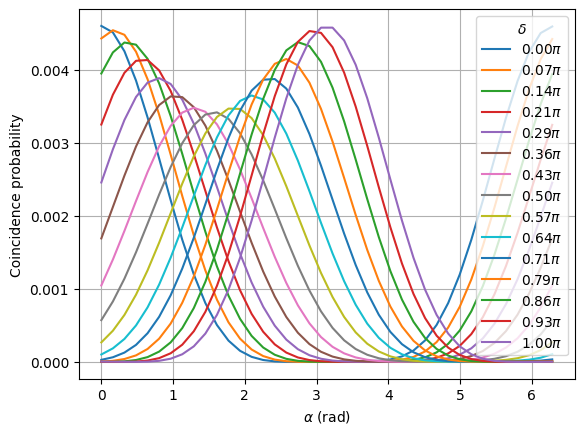

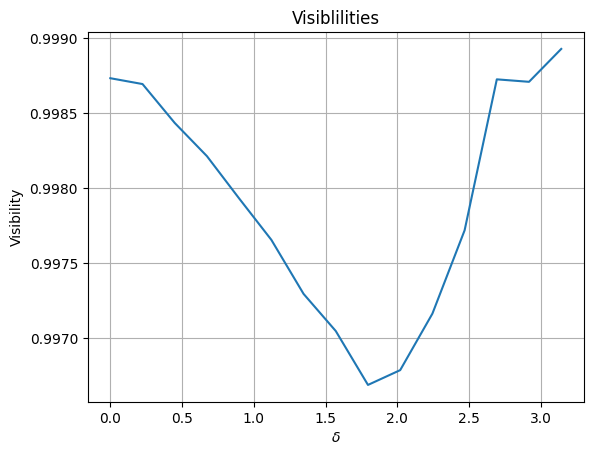

In [37]:
start = time.time()

read_quantum_state(psi, N)

coincidence_PNR = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, rotations = {"signal":(0,1), "idler":(2,3)}, measurements = {1:(0,2), 0:(1,3)}, pnr = True, det_outcome = 3, compress=True, contract=True, draw = False)

fringes = {theta:data for theta, data in zip(idler_angles, coincidence_PNR)}
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles)

print(time.time()-start)

In [8]:
# params
trunc = 3
N = trunc+1
error_tolerance = 1e-7

mean_photon_num = (0.5)
efficiency = 0.9


num_modes = 8
# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
# psi = new_ls(N, mean_photon_num, error_tolerance) 

# Include emission from other lightsource
psi = extend_MPS(psi)

# only for drawing the TN. Not used otherwise
fix = {(f"L{j}",f"I{num_modes - i-1}"):(3*j,i+5) for j in range(10) for i in range(10)}

idler_angles = np.linspace(0, np.pi, 15)
signal_angles = np.linspace(0, 2*np.pi, 40)

21.844855308532715


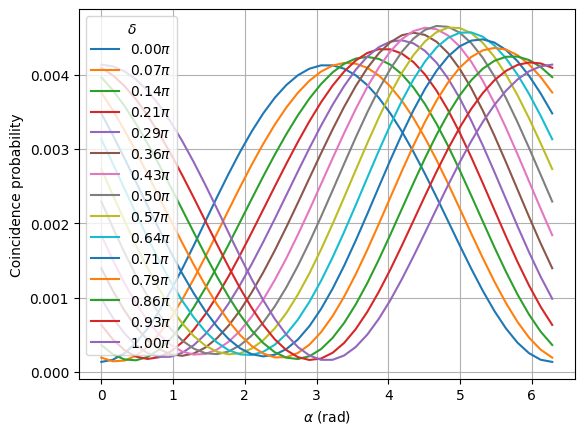

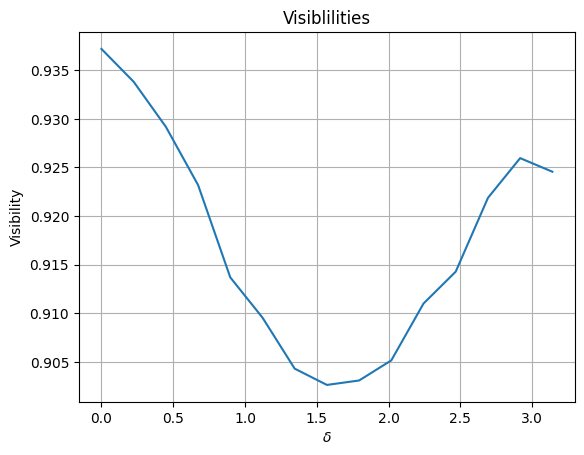

In [6]:
start = time.time()
# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = False, compress=True, contract=True)

coincidence_Threshold = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, pnr = False, compress=True, contract=True, draw = False)

fringes = {theta:data for theta, data in zip(idler_angles, coincidence_Threshold)}
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles)

print(time.time()-start)

Threshold results

{0.0: [0.00013365769957519633, 0.00016303893788388634, 0.00025015095666637, 0.00039195325411064345, 0.0005835560006371025, 0.0008184719683298707, 0.0010889414917923813, 0.001386305890209363, 0.001701401929315957, 0.002024949588033064, 0.002347907602082472, 0.002661775719402979, 0.002958828830656355, 0.003232275472206979, 0.003476340875448955, 0.00368628196791988, 0.0038583477877960127, 0.003989703055319082, 0.004078334746343371, 0.004122961261987451, 0.0041229612619873976, 0.0040783347463433815, 0.003989703055319097, 0.003858347787795994, 0.0036862819679198155, 0.0034763408754489504, 0.0032322754722070176, 0.0029588288306563633, 0.0026617757194029785, 0.0023479076020824826, 0.0020249495880330583, 0.0017014019293159525, 0.001386305890209379, 0.001088941491792397, 0.0008184719683298653, 0.0005835560006371046, 0.0003919532541106473, 0.0002501509566663714, 0.00016303893788388905, 0.0001336576995751964], 0.2243994752564138: [0.00019161746062164236, 0.00014221576605032314, 0.0001512687094072

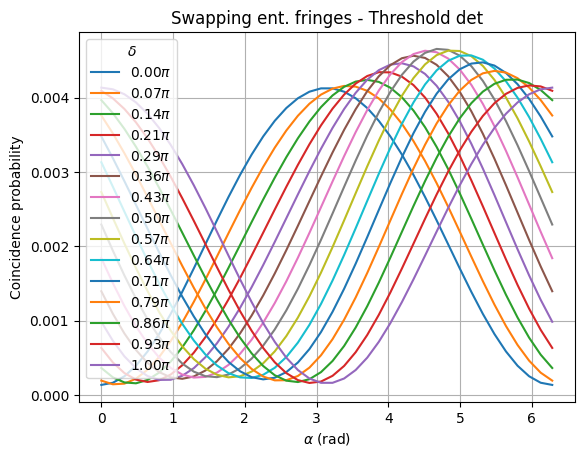

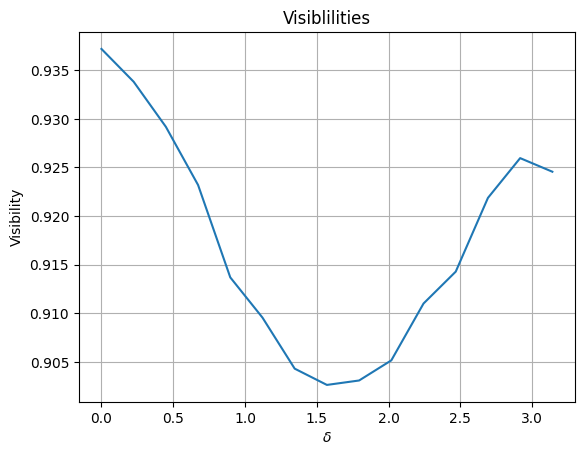

In [5]:
fringes = {theta:data for theta, data in zip(idler_angles, coincidence_Threshold)}
print(fringes)

# json.dump(fringes, open(f"fringe_threshold_trunc{trunc}.json", "w"))

# plot_coincidences(coincidence_Threshold, idler_angles, signal_angles, title = "Swapping ent. fringes - Threshold det")
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles, title = "Swapping ent. fringes - Threshold det")

PNR results

{0.0: [4.9073652746634596e-06, 8.424977488367197e-06, 1.8886703236331908e-05, 3.6021570241117976e-05, 5.938576484406468e-05, 8.837412959295761e-05, 0.00012223584031918107, 0.00016009385628342227, 0.00020096763920967722, 0.0002437985523704477, 0.0002874772815235488, 0.00033087256722431365, 0.0003728605041909812, 0.0004123536488499935, 0.0004483291812952965, 0.00047985539251400064, 0.0005061158112099795, 0.0005264303457601405, 0.0005402728941720154, 0.0005472849663720493, 0.0005472849663720451, 0.0005402728941720168, 0.0005264303457601396, 0.0005061158112099849, 0.0004798553925139997, 0.0004483291812953059, 0.0004123536488499986, 0.0003728605041909874, 0.00033087256722432037, 0.0002874772815235482, 0.00024379855237045183, 0.00020096763920968348, 0.00016009385628342694, 0.00012223584031918487, 8.837412959296061e-05, 5.938576484406727e-05, 3.602157024112034e-05, 1.8886703236333483e-05, 8.424977488368049e-06, 4.907365274663461e-06], 0.2243994752564138: [1.1831965894267491e-05, 5.42579189116

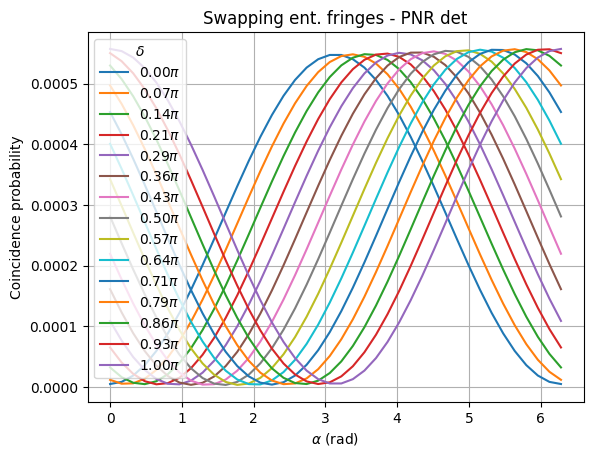

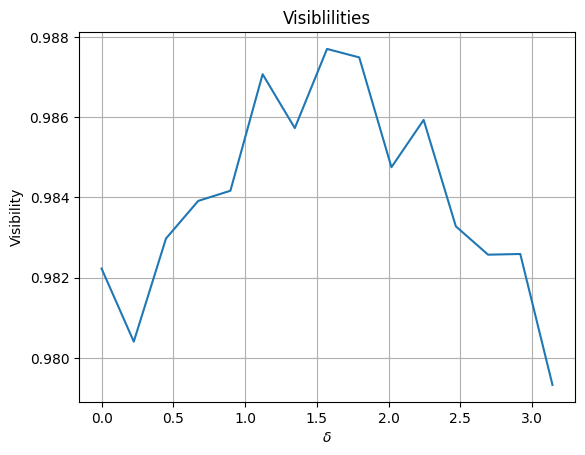

In [6]:
fringes = {theta:data for theta, data in zip(idler_angles, coincidence_PNR)}
print(fringes)

# json.dump(fringes, open(f"fringe_PNR_trunc{trunc}.json", "w"))

# plot_coincidences(coincidence_PNR, idler_angles, signal_angles, title = "Swapping ent. fringes - PNR det")
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles, title = "Swapping ent. fringes - PNR det")

{0.0: [4.9073652746634596e-06, 8.424977488367197e-06, 1.8886703236331908e-05, 3.6021570241117976e-05, 5.938576484406468e-05, 8.837412959295761e-05, 0.00012223584031918107, 0.00016009385628342227, 0.00020096763920967722, 0.0002437985523704477, 0.0002874772815235488, 0.00033087256722431365, 0.0003728605041909812, 0.0004123536488499935, 0.0004483291812952965, 0.00047985539251400064, 0.0005061158112099795, 0.0005264303457601405, 0.0005402728941720154, 0.0005472849663720493, 0.0005472849663720451, 0.0005402728941720168, 0.0005264303457601396, 0.0005061158112099849, 0.0004798553925139997, 0.0004483291812953059, 0.0004123536488499986, 0.0003728605041909874, 0.00033087256722432037, 0.0002874772815235482, 0.00024379855237045183, 0.00020096763920968348, 0.00016009385628342694, 0.00012223584031918487, 8.837412959296061e-05, 5.938576484406727e-05, 3.602157024112034e-05, 1.8886703236333483e-05, 8.424977488368049e-06, 4.907365274663461e-06], 0.2243994752564138: [1.1831965894267491e-05, 5.42579189116

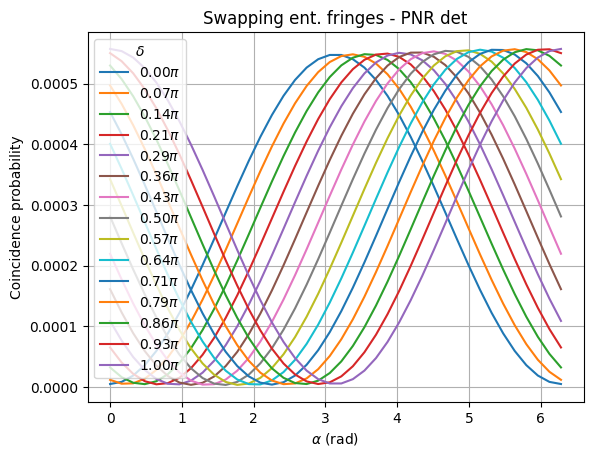

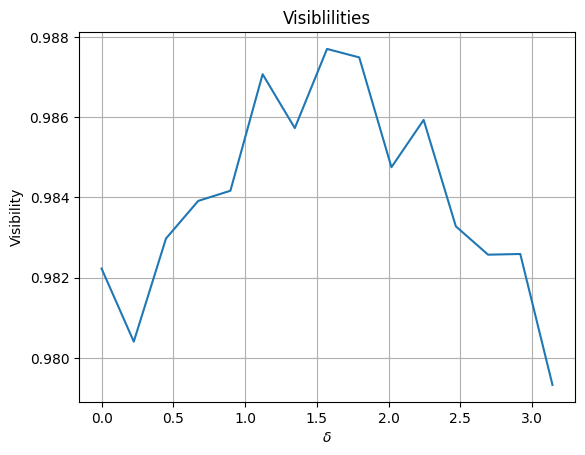

In [ ]:
fringes = {theta:data for theta, data in zip(idler_angles, coincidence_PNR)}
print(fringes)

# json.dump(fringes, open(f"fringe_PNR_trunc{trunc}.json", "w"))

# plot_coincidences(coincidence_PNR, idler_angles, signal_angles, title = "Swapping ent. fringes - PNR det")
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles, title = "Swapping ent. fringes - PNR det")

Performing same simulatiosn for higher truncation

Common parameters and functions

In [12]:
# params
trunc = 3
N = trunc+1
error_tolerance = 1e-15

mean_photon_num = (0.5)
efficiency = 0.9


num_modes = 8
# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
# psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
psi = new_ls(N, mean_photon_num, error_tolerance) 

# Include emission from other lightsource
psi = extend_MPS(psi)

# only for drawing the TN. Not used otherwise
fix = {(f"L{j}",f"I{num_modes - i-1}"):(3*j,i+5) for j in range(10) for i in range(10)}

idler_angles = np.linspace(0, np.pi, 15)
signal_angles = np.linspace(0, 2*np.pi, 40)

Performing measurements: 

Threshold detection

In [13]:
start = time.time()
# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = False, compress=True, contract=True)

coincidence_Threshold = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, pnr = False, compress=True, contract=True, draw = False)
print(time.time()-start)

60.853771448135376


PNR detection

In [14]:
start = time.time()
# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = True, compress=True, contract=True)

coincidence_PNR = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, pnr = True, compress=True, contract=True, draw = False)
print(time.time()-start)

78.609778881073


Threshold results

{0.0: [0.00019096931916647098, 0.0002252474022819006, 0.00032650973126167047, 0.0004901630657022909, 0.0007089301695511976, 0.0009733792225861329, 0.0012725836682379176, 0.00159484832788885, 0.0019284316805512985, 0.0022621994033148957, 0.0025861562792318456, 0.0028918206624737905, 0.003172425274461435, 0.0034229475504906045, 0.0036399897682759044, 0.003821542116836119, 0.003966669847781377, 0.004075168608379109, 0.00414723052362855, 0.004183158488661982, 0.004183158488661966, 0.0041472305236284895, 0.004075168608379104, 0.003966669847781412, 0.003821542116836092, 0.003639989768275865, 0.0034229475504905776, 0.003172425274461402, 0.0028918206624737744, 0.0025861562792318144, 0.0022621994033148896, 0.0019284316805512455, 0.0015948483278888273, 0.0012725836682379106, 0.0009733792225861018, 0.0007089301695511806, 0.00049016306570228, 0.00032650973126166206, 0.00022524708639504648, 0.00019096931916647128], 0.2243994752564138: [0.0002574705283806611, 0.00020262674261127642, 0.00021578093025

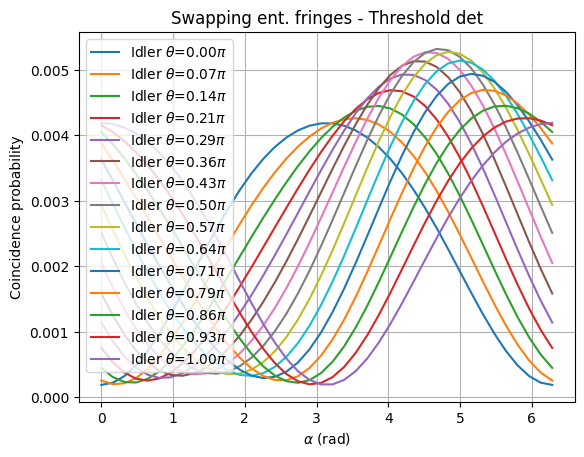

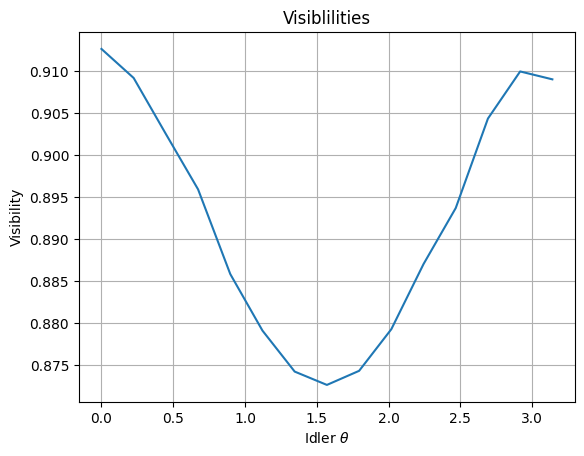

In [15]:
fringes = {theta:data for theta, data in zip(idler_angles, coincidence_Threshold)}
print(fringes)

# json.dump(fringes, open(f"fringe_threshold_trunc{trunc}.json", "w"))

# plot_coincidences(coincidence_Threshold, idler_angles, signal_angles, title = "Swapping ent. fringes - Threshold det")
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles, title = "Swapping ent. fringes - Threshold det")

PNR results

{0.0: [5.645487801932231e-06, 9.485984115178552e-06, 2.090795530199822e-05, 3.961561641217694e-05, 6.512443603775684e-05, 9.677374914960081e-05, 0.00013374385516273365, 0.00017507724775091133, 0.00021970341375754005, 0.0002664665589240888, 0.00031415554235429905, 0.00036153524442719627, 0.00040737855574650276, 0.00045049815862942933, 0.0004897772780110001, 0.0005241986053315976, 0.0005528706462943169, 0.000575050810098939, 0.0005901646421536531, 0.0005978207021471514, 0.0005978207021471549, 0.0005901646421536517, 0.0005750508100989391, 0.0005528706462943058, 0.0005241986053315927, 0.0004897772780109946, 0.0004504981586294228, 0.00040737855574649663, 0.00036153524442718955, 0.00031415554235429254, 0.00026646655892408484, 0.00021970341375753517, 0.0001750772477509064, 0.00013374385516272728, 9.677374914959661e-05, 6.512443603775292e-05, 3.961561641217448e-05, 2.0907955301996245e-05, 9.485971303291066e-06, 5.64548780193228e-06], 0.2243994752564138: [1.3161842023239423e-05, 6.1788501195264

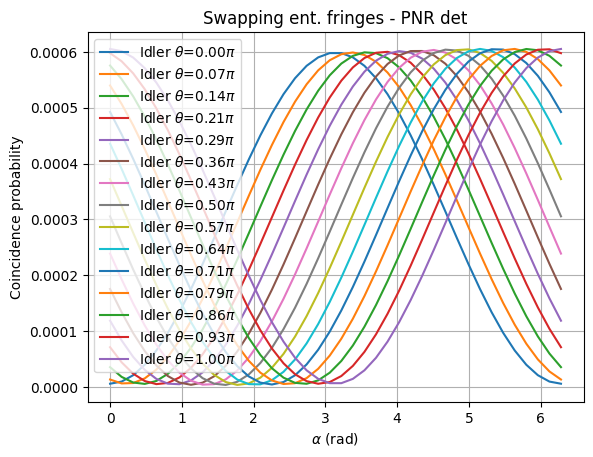

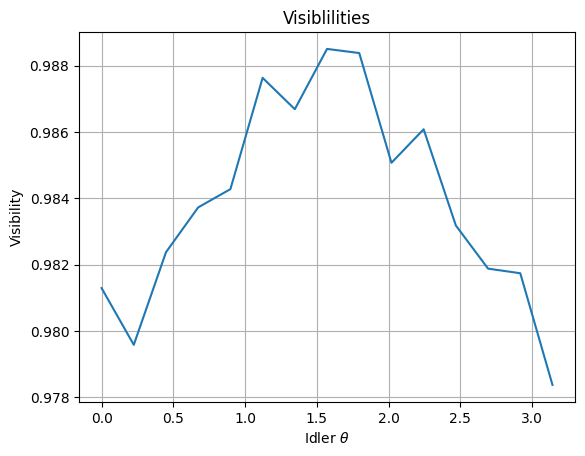

In [16]:
fringes = {theta:data for theta, data in zip(idler_angles, coincidence_PNR)}
print(fringes)

# json.dump(fringes, open(f"fringe_PNR_trunc{trunc}.json", "w"))

# plot_coincidences(coincidence_PNR, idler_angles, signal_angles, title = "Swapping ent. fringes - PNR det")
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles, title = "Swapping ent. fringes - PNR det")

Making final plots

0.9823095701415749 [5.07429115867197e-06, 8.728985373732791e-06, 1.9598413358404035e-05, 3.74010626373523e-05, 6.1675853945554e-05, 9.17940829390854e-05, 0.00012697570330739676, 0.00016630952956299633, 0.0002087768362669814, 0.00025327774248275935, 0.00029865969811459966, 0.00034374733434967315, 0.0003873729050929431, 0.00042840653097761896, 0.00046578546264725045, 0.0004985416054058529, 0.0005258265923619825, 0.0005469337566856143, 0.0005613164339078628, 0.0005686021202435397, 0.0005686021202435369, 0.0005613164339078659, 0.0005469337566856179, 0.000525826592361977, 0.0004985416054058504, 0.00046578546264725566, 0.00042840653097762026, 0.0003873729050929502, 0.0003437473343496751, 0.00029865969811460036, 0.0002532777424827606, 0.0002087768362669834, 0.00016630952956299928, 0.00012697570330739695, 9.17940829390877e-05, 6.16758539455547e-05, 3.7401062637353397e-05, 1.959841335840501e-05, 8.72898537373312e-06, 5.074291158671947e-06]
0.9804889617366264 [1.2267814836764372e-05, 5.612388860

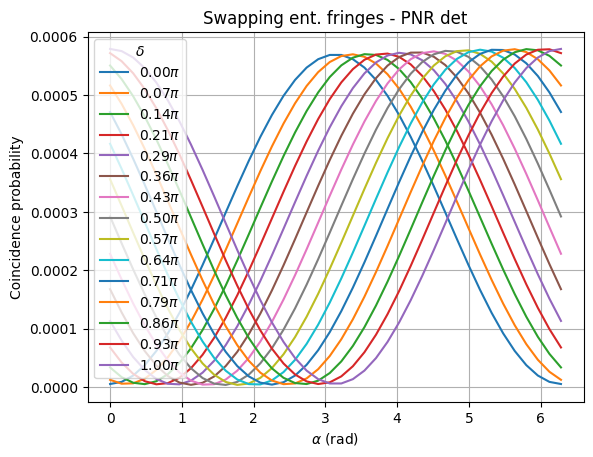

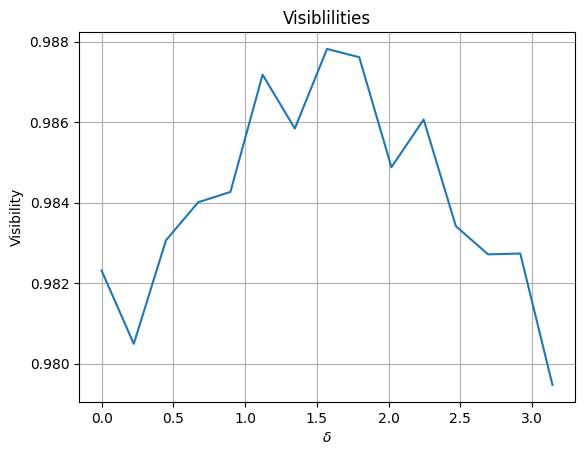

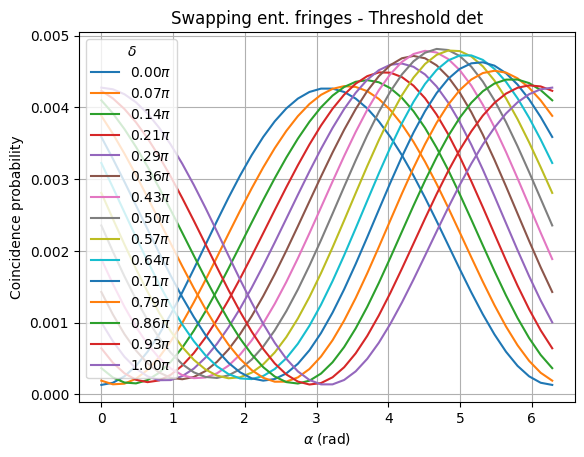

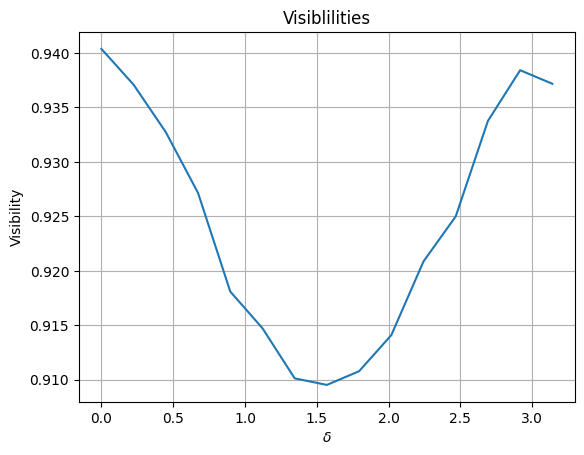

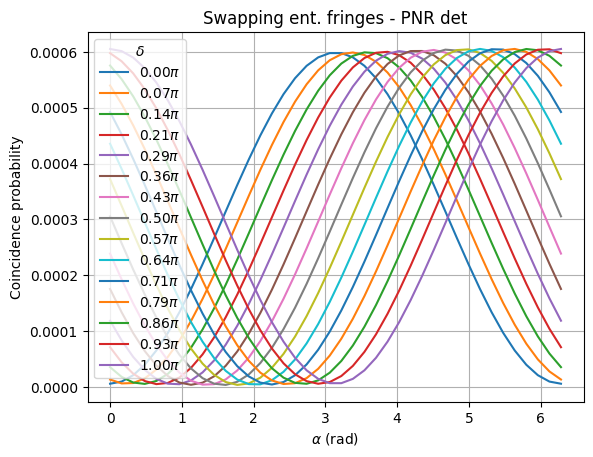

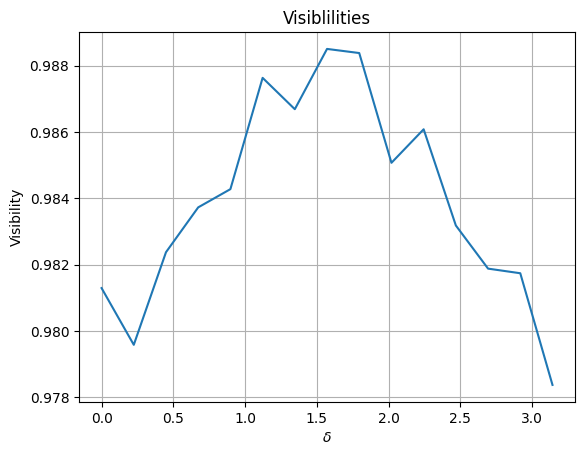

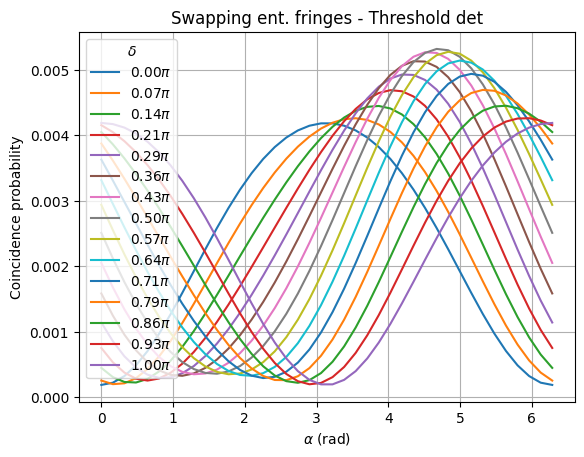

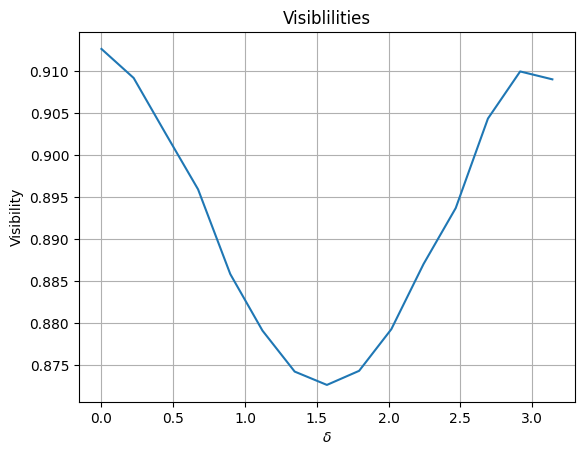

In [2]:
signal_angles = np.linspace(0, 2*np.pi, 40)

data_file = open("final_data/fringe_data/fringe_PNR_trunc2.json", 'r')
data = json.load(data_file)

# idler_angles = list(data.keys())
# # print()
# print(np.array(list(map(float, idler_angles)))/np.pi)



plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping ent. fringes - PNR det")

data_file = open("final_data/fringe_data/fringe_threshold_trunc2.json", 'r')
data = json.load(data_file)
plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping ent. fringes - Threshold det")

data_file = open("final_data/fringe_data/fringe_PNR_trunc3.json", 'r')
data = json.load(data_file)
plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping ent. fringes - PNR det")

data_file = open("final_data/fringe_data/fringe_threshold_trunc3.json", 'r')
data = json.load(data_file)
plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping ent. fringes - Threshold det")


# plt.figure()
# plt.title("TN - Wall clock time for different MPN and cutoff accuracy")
# plt.ylim(10**-1,10**2.5)
# plt.xlabel("Local Hilbert space dimension")
# plt.ylabel("Wall clock time (s)")
# for (key,value), color in zip(list(data.items()), colors):
#     plt.plot(truncations, value, label=f"{key}, MPN=0.1", color = color, marker='x')
#     print(value, key)
# plt.legend()
# plt.yscale('log')

## Cascaded entanglement swaps

In [ ]:
def bell_state_measurement(psi, N, site_tags, num_modes, efficiency, error_tolerance, modes = [(2,6),(3,7)], meas = {0:[3,6], 1:[2,7]}, pnr = False, compress = True, contract = True):

    
    for mode in modes:
        # Create the beamsplitter operator
        U_BS = create_BS_MPO(site1 = mode[0], site2 = mode[1], theta=np.pi/4, total_sites = num_modes, N = N, tag = r"$U_{BS}$")
        enforce_1d_like(U_BS, site_tags=site_tags, inplace=True)

        # Assign circuit level tag for drawing 
        U_BS.add_tag("L2")

        # Apply operator to MPS
        psi = tensor_network_apply_op_vec(U_BS, psi, compress=compress, contract = contract, cutoff = error_tolerance)

    for outcome, sites in meas.items(): 
        # Create the sqrt POVM operators
        POVM_OPs = generate_sqrt_POVM_MPO(sites=sites, outcome = outcome, total_sites=num_modes, efficiency=efficiency, N=N, pnr = pnr)

        # Assign circuit level tag for drawing and apply POVM operators to MPS
        for POVM_OP in POVM_OPs:
            POVM_OP.add_tag("L3")
            psi = tensor_network_apply_op_vec(POVM_OP, psi, compress=compress, contract = contract, cutoff = error_tolerance)
    
    return psi

# psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance)

In [11]:
def rotate_and_measure(psi, N, site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, modes = [(0,1),(4,5)], meas = {0:[1,5], 1:[0,4]}, pnr = False, compress = True, contract = True, draw = False):
    # idler_angles = [0]
    # angles = [np.pi/4]

    # We make this correction here since the rotator hamiltonian is 1/2(a_v b_h + a_h b_v), which does not show up in the bs unitary, whose function we are reusing to 
    # rotate the state.
    idler_angles = idler_angles/2
    signal_angles = signal_angles/2

    coincidence = []


    
    POVM_0_OPs = generate_sqrt_POVM_MPO(sites=meas[0], outcome = 0, total_sites=num_modes, efficiency=efficiency, N=N, pnr = pnr)
    POVM_1_OPs = generate_sqrt_POVM_MPO(sites=meas[1], outcome = 1, total_sites=num_modes, efficiency=efficiency, N=N, pnr = pnr)
    
    # POVM_1_OPs = generate_sqrt_POVM_MPO(sites=(0,4), outcome = 1, total_sites=num_modes, efficiency=efficiency, N=N, pnr = pnr)
    # POVM_0_OPs = generate_sqrt_POVM_MPO(sites=(1,5), outcome = 0, total_sites=num_modes, efficiency=efficiency, N=N, pnr = pnr)

    meas_ops = POVM_1_OPs
    meas_ops.extend(POVM_0_OPs)

    for i, idler_angle in enumerate(idler_angles):
        coincidence_probs = []

        rotator_node_1 = create_BS_MPO(site1 = modes[0][0], site2 = modes[0][1], theta=idler_angle, total_sites = num_modes, N = N, tag = r"$Rotator_I$")
        enforce_1d_like(rotator_node_1, site_tags=site_tags, inplace=True)
        rotator_node_1.add_tag("L5")
        idler_rotated_psi = tensor_network_apply_op_vec(rotator_node_1, psi, compress=compress, contract = contract, cutoff = error_tolerance)


        for j, angle in enumerate(signal_angles):
            # print("idler:", i, "signal:", j)
        
            rotator_node_2 = create_BS_MPO(site1 = modes[1][0], site2 = modes[1][1], theta=angle, total_sites = num_modes, N = N, tag = r"$Rotator_S$")
            enforce_1d_like(rotator_node_2, site_tags=site_tags, inplace=True)
        
            # Rotate and measure:
            rotator_node_2.add_tag("L5")
            rho_rotated = tensor_network_apply_op_vec(rotator_node_2, idler_rotated_psi, compress=compress, contract = contract, cutoff = error_tolerance)

            # read_quantum_state(psi)
            # read_quantum_state(rho_rotated)

            for POVM_OP in meas_ops:
                POVM_OP.add_tag("L6")
                rho_rotated = tensor_network_apply_op_vec(POVM_OP, rho_rotated, compress=compress, contract = contract, cutoff = error_tolerance)
        
            if draw:
                rho_rotated.draw(color = [r'$HH+VV$', r'$U_{BS_H}$', r"$U_{BS_V}$", 'POVM', r'$Rotator_I$', r'$Rotator_S$'], title = "Polarization entanglement swapping MPS", fix = fix, show_inds = True, show_tags = False)
                # rho_rotated.draw_tn()
            coincidence_probs.append((rho_rotated.norm())**2)
        coincidence.append(coincidence_probs)
    
    return coincidence

# coincidence = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance)

In [58]:
# params
trunc = 2
N = trunc+1
error_tolerance = 1e-5

mean_photon_num = (0.6)
efficiency = 0.9


num_modes = 8
# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
# psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
psi = new_ls(N, mean_photon_num, error_tolerance) 

# Include emission from other lightsource
psi = extend_MPS(psi)

# only for drawing the TN. Not used otherwise
fix = {(f"L{j}",f"I{num_modes - i-1}"):(3*j,i+5) for j in range(10) for i in range(10)}

idler_angles = np.linspace(0, np.pi, 10)#  15)
signal_angles = np.linspace(0, 2*np.pi, 10)# 40)

# print("second extension:")
# psi = extend_MPS(psi)
# psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = False, compress=True, contract=True)
psi

(3, 3)
(3, 6, 3)
(6, 3, 3)
(3, 1, 3)
(1, 3, 3)
(3, 6, 3)
(6, 3, 3)
(3, 3)


/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


MatrixProductState(tensors=8, indices=15, L=8, max_bond=6)

MatrixProductState([
    Tensor(shape=(3, 3), inds=('_261fa9AAcfz', 'k0'), tags=oset(['I0', 'L1', '$HH+VV$'])),
    Tensor(shape=(3, 6, 3), inds=('_261fa9AAcfz', '_261fa9AAcgA', 'k1'), tags=oset(['I1', 'L1', '$HH+VV$']), left_inds=('_261fa9AAcgA', 'k1')),
    Tensor(shape=(13, 11, 3), inds=('_261fa9AAcgC', '_261fa9AAcgD', 'k4'), tags=oset(['I4', 'L2', 'L1', '$HH+VV$']), left_inds=('_261fa9AAcgD', 'k4')),
    Tensor(shape=(11, 5, 3), inds=('_261fa9AAcgD', '_261fa9AAcgE', 'k5'), tags=oset(['I5', 'L2', 'L1', '$HH+VV$']), left_inds=('_261fa9AAcgE', 'k5')),
    Tensor(shape=(9, 13, 3), inds=('_261fa9AAcgB', '_261fa9AAcgC', 'k3'), tags=oset(['I3', 'L1', '$HH+VV$', 'L2', '$U_{BS}$', 'POVM', 'L3']), left_inds=('_261fa9AAcgC', 'k3')),
    Tensor(shape=(5, 2, 3), inds=('_261fa9AAcgE', '_261fa9AAcgF', 'k6'), tags=oset(['I6', 'L2', 'L1', '$HH+VV$', '$U_{BS}$', 'POVM', 'L3']), left_inds=('_261fa9AAcgF', 'k6')),
    Tensor(shape=(6, 9, 3), inds=('_261fa9AAcgA', '_261fa9AAcgB', 'k2'), tags=oset(['I2'

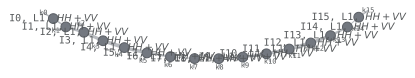

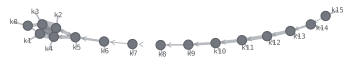

MatrixProductState([
    Tensor(shape=(5, 2, 3), inds=('_261fa9AAciO', '_261fa9AAciP', 'k6'), tags=oset(['I6', 'L1', '$HH+VV$']), left_inds=('_261fa9AAciP', 'k6')),
    Tensor(shape=(2, 1, 3), inds=('_261fa9AAciP', '_261fa9AAciQ', 'k7'), tags=oset(['I7', 'L1', '$HH+VV$']), left_inds=('_261fa9AAciQ', 'k7')),
    Tensor(shape=(1, 3, 3), inds=('_261fa9AAciQ', '_261fa9AAciR', 'k8'), tags=oset(['I8', 'L1', '$HH+VV$']), left_inds=('_261fa9AAciR', 'k8')),
    Tensor(shape=(3, 6, 3), inds=('_261fa9AAciR', '_261fa9AAciS', 'k9'), tags=oset(['I9', 'L1', '$HH+VV$']), left_inds=('_261fa9AAciS', 'k9')),
    Tensor(shape=(6, 9, 3), inds=('_261fa9AAciS', '_261fa9AAciT', 'k10'), tags=oset(['I10', 'L1', '$HH+VV$']), left_inds=('_261fa9AAciT', 'k10')),
    Tensor(shape=(9, 13, 3), inds=('_261fa9AAciT', '_261fa9AAciU', 'k11'), tags=oset(['I11', 'L1', '$HH+VV$']), left_inds=('_261fa9AAciU', 'k11')),
    Tensor(shape=(13, 11, 3), inds=('_261fa9AAciU', '_261fa9AAciV', 'k12'), tags=oset(['I12', 'L1', '$HH+VV$

SystemError: CPUDispatcher(<function svd_truncated_numba at 0x7f5d8235cd30>) returned a result with an exception set

In [59]:
start = time.time()
# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = False, compress=True, contract=True)
print(psi)

psi = extend_MPS(psi)

psi.draw()

# Something is not working here. Check the function and its application on the MPS. 
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, modes = [(4,8),(5,9)], meas = {0:[8,5], 1:[4,9]}, pnr = False, compress=True, contract=True)
psi.draw()
print(psi)
coincidence_Threshold = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, modes = [(0,1),(14,15)], meas = {0:[0,14], 1:[1,15]}, pnr = False, compress=True, contract=True, draw = False)
# print(time.time()-start)

## Performing the same simulations with lower detector efficiency

In [ ]:
# params
trunc = 3
N = trunc+1
# mean_photon_num = 0.02
# num_modes = 8
# efficiency = 0.9
error_tolerance = 1e-15

mean_photon_num = (0.6)
num_modes = 8
efficiency = 0.5 # 0.9
initial_error_tolerance = 1e-15

# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
# psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
psi = new_ls(N, mean_photon_num, error_tolerance) 

# Include emission from other lightsource
start = time.time()
psi = extend_MPS(psi)

error_tolerance = 1e-15

# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = True, compress=True, contract=True)

# psi.draw()

# Rotate polarizers and perform measurements
# idler_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
idler_angles = np.linspace(0, np.pi, 15) # 15)
signal_angles = np.linspace(0, 2*np.pi, 40)
# signal_angles = [0]
fix = {(f"L{j}",f"I{num_modes - i-1}"):(3*j,i+5) for j in range(10) for i in range(10)}
coincidence = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, pnr = True, compress=True, contract=True, draw = False)
print(time.time()-start)

/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/home/asingal/home/.venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


91.33076286315918


0.634391100202672 [0.00018075869836316801, 0.0001848271983711996, 0.00019692624230414338, 0.00021674328257176412, 0.00024376479545476759, 0.0002772909379632332, 0.00031645340061666415, 0.00036023789620343266, 0.000407510429286774, 0.00045704666609095167, 0.0005075636441029232, 0.0005577530001275287, 0.0006063148562069812, 0.0006519914857772099, 0.0006935998881251396, 0.0007300624274858779, 0.0007604347432428667, 0.0007839302083718363, 0.0007999403026675443, 0.0008080503730974549, 0.0008080503730974555, 0.0007999403026675405, 0.0007839302083718285, 0.0007604347432428684, 0.0007300624274858844, 0.000693599888125136, 0.0006519914857772054, 0.0006063148562069788, 0.0005577530001275241, 0.0005075636441029248, 0.00045704666609095004, 0.00040751042928677587, 0.0003602378962034291, 0.00031645340061666664, 0.0002772909379632355, 0.00024376479545477116, 0.00021674328257176293, 0.00019692624230414405, 0.00018482692558542734, 0.00018075869836316915]
0.633278449170395 [0.00018871129123387045, 0.000

Text(0.5, 0, 'Idler $\\theta$')

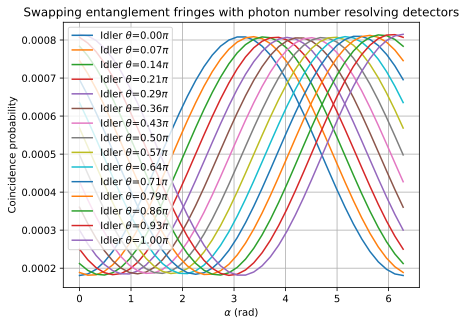

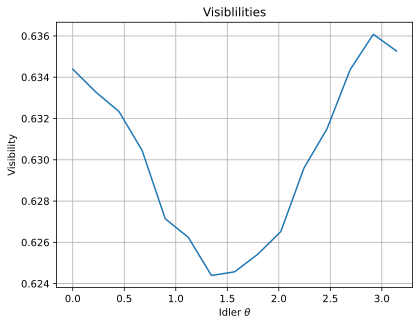

In [13]:
visibilities = []
for i in range(len(coincidence)):
    visibility = (max(coincidence[i]) - min(coincidence[i])) / (max(coincidence[i]) + min(coincidence[i]))
    visibilities.append(visibility)
    print(visibility, coincidence[i])

plt.figure()
plt.grid(True)
for i in range(len(idler_angles)):
    # print(fringe_real[i])
    plt.plot(signal_angles, coincidence[i], label=r'Idler $\theta$={:.2f}$\pi$'.format(idler_angles[i]/np.pi))
plt.title("Swapping entanglement fringes with photon number resolving detectors")
plt.ylabel("Coincidence probability")
plt.xlabel(r"$\alpha$ (rad)")    
plt.legend()

plt.figure()
plt.grid(True)
# for i in range(len(alpha_list)-1):
#     print(fringe_real[i])
plt.plot(idler_angles, visibilities)
plt.title("Visiblilities")
plt.ylabel("Visibility")
plt.xlabel(r"Idler $\theta$")    
# plt.legend()

This simulation is using the threshold detectors (original definition of POVM operator). 

In [14]:
# params
trunc = 3
N = trunc+1
# mean_photon_num = 0.02
# num_modes = 8
# efficiency = 0.9
error_tolerance = 1e-20

mean_photon_num = 0.6
num_modes = 8
efficiency = 0.5

# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
# psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
psi = new_ls(N, mean_photon_num, error_tolerance) 

# Include emission from other lightsource
start = time.time()
psi = extend_MPS(psi)

read_quantum_state(psi, N, num_states = 4)


# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = False, compress=True, contract=True)

read_quantum_state(psi, N, num_states = 4)

# psi.draw()

# Rotate polarizers and perform measurements
# idler_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
idler_angles = np.linspace(0, np.pi, 15) # 15)
signal_angles = np.linspace(0, 2*np.pi, 40)
# signal_angles = [0]
fix = {(f"L{j}",f"I{num_modes - i-1}"):(3*j,i+5) for j in range(10) for i in range(10)}
coincidence = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, pnr = False, compress=True, contract=True, draw = False)
print(time.time()-start)

Corresponding Basis terms:
0H0V_D 0H0V_C 0H0V_B 0H0V_A - 0 - [0.33112129+0.j]
0H0V_D 0H0V_C 0H1V_B 0H1V_A - 10 - [0.+0.18736198j]
0H0V_D 0H0V_C 0H2V_B 0H2V_A - 20 - [-0.26460474+0.j]
0H0V_D 0H0V_C 1H0V_B 1H0V_A - 30 - [0.+0.18736198j]
0H0V_D 0H0V_C 1H1V_B 1H1V_A - 40 - [-0.10601708+0.j]
0H0V_D 0H0V_C 2H0V_B 2H0V_A - 60 - [-0.26460474+0.j]
0H1V_D 0H1V_C 0H0V_B 0H0V_A - 810 - [0.+0.18736198j]
0H1V_D 0H1V_C 0H1V_B 0H1V_A - 820 - [-0.10601708+0.j]
0H1V_D 0H1V_C 0H2V_B 0H2V_A - 830 - [-0.-0.14972419j]
0H1V_D 0H1V_C 1H0V_B 1H0V_A - 840 - [-0.10601708+0.j]
0H1V_D 0H1V_C 1H1V_B 1H1V_A - 850 - [-0.-0.0599888j]
0H1V_D 0H1V_C 2H0V_B 2H0V_A - 870 - [-0.-0.14972419j]
0H2V_D 0H2V_C 0H0V_B 0H0V_A - 1620 - [-0.26460474+0.j]
0H2V_D 0H2V_C 0H1V_B 0H1V_A - 1630 - [-0.-0.14972419j]
0H2V_D 0H2V_C 0H2V_B 0H2V_A - 1640 - [0.21145022-0.j]
0H2V_D 0H2V_C 1H0V_B 1H0V_A - 1650 - [-0.-0.14972419j]
0H2V_D 0H2V_C 1H1V_B 1H1V_A - 1660 - [0.08472008-0.j]
0H2V_D 0H2V_C 2H0V_B 2H0V_A - 1680 - [0.21145022-0.j]
1H0V_D 1H0

0.8235598463979527 [6.8844862131526995e-06, 7.2758396265781815e-06, 8.441727849129548e-06, 1.0357644347367135e-05, 1.2982797189083608e-05, 1.6260256758682255e-05, 2.0117291782646612e-05, 2.4466002136694812e-05, 2.9204360796217694e-05, 3.421776501956543e-05, 3.9381168909902105e-05, 4.456182812816508e-05, 4.96226365072387e-05, 5.442597858703712e-05, 5.883796725342489e-05, 6.273288740994649e-05, 6.599763012997153e-05, 6.853588117859177e-05, 7.027182583234065e-05, 7.115314946789921e-05, 7.115314946789889e-05, 7.027182583234086e-05, 6.853588117859149e-05, 6.599763012997143e-05, 6.273288740994615e-05, 5.8837967253424456e-05, 5.442597858703647e-05, 4.962263650723853e-05, 4.456182812816498e-05, 3.938116890990225e-05, 3.421776501956539e-05, 2.9204360796217637e-05, 2.4466002136694812e-05, 2.0117291782646642e-05, 1.6260256758682238e-05, 1.298279718908368e-05, 1.0357644347367145e-05, 8.441727849129503e-06, 7.275839626578107e-06, 6.884486213152729e-06]
0.8028146366008012 [7.700706214380577e-06, 7.8

Text(0.5, 0, 'Idler $\\theta$')

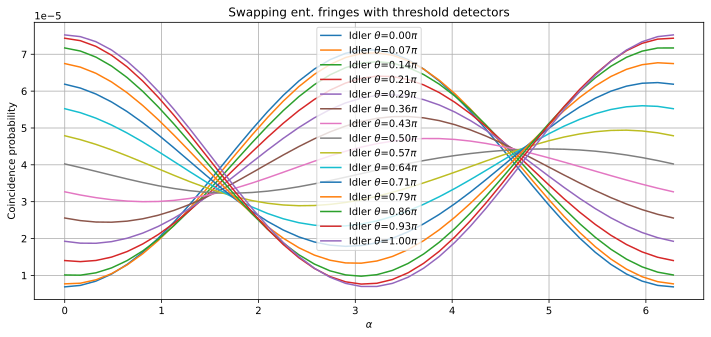

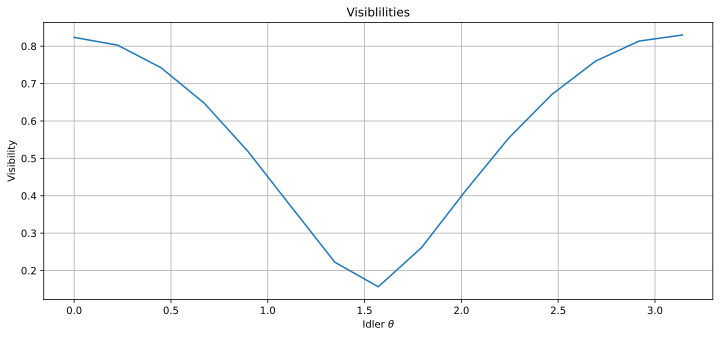

Bad pipe message: %s [b'\xf6v', b'\xe9\x11o\xedol\xa2\xa9\x88\xe6\x15\xd2\xfaq\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x13\x01\x13\x02\x13\x03\x13\x04\x13\x05\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0']
Bad pipe message: %s [b'\n\xc0\x0b\xc0\x0c\xc0\r\xc0']
Bad pipe message: %s [b'\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15']
Bad pip

In [15]:
visibilities = []
for i in range(len(coincidence)):
    visibility = (max(coincidence[i]) - min(coincidence[i])) / (max(coincidence[i]) + min(coincidence[i]))
    visibilities.append(visibility)
    print(visibility, coincidence[i])

plt.figure(figsize = (12,5))
plt.grid(True)
for i in range(len(idler_angles)):
    # print(fringe_real[i])
    plt.plot(signal_angles, coincidence[i], label=r'Idler $\theta$={:.2f}$\pi$'.format(idler_angles[i]/np.pi))
plt.title("Swapping ent. fringes with threshold detectors")
plt.ylabel("Coincidence probability")
plt.xlabel(r"$\alpha$")    
plt.legend()

plt.figure(figsize = (12,5))
plt.grid(True)
# for i in range(len(alpha_list)-1):
#     print(fringe_real[i])
plt.plot(idler_angles, visibilities)
plt.title("Visiblilities")
plt.ylabel("Visibility")
plt.xlabel(r"Idler $\theta$")    
# plt.legend()

In [22]:
# params
trunc = 3
N = trunc+1
# mean_photon_num = 0.02
# num_modes = 8
# efficiency = 0.9
error_tolerance = 1e-15

mean_photon_num = np.sqrt(0.06)
num_modes = 8
efficiency = 0.9
initial_error_tolerance = 1e-15

# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# Include emission from other lightsource
start = time.time()
psi = extend_MPS(psi)

error_tolerance = 1e-15

# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = False, compress=True, contract=True)

# psi.draw()

# Rotate polarizers and perform measurements
# idler_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
idler_angles = np.linspace(0, np.pi/2, 10)
signal_angles = np.linspace(0, np.pi, 20)
# signal_angles = [0]
fix = {(f"L{j}",f"I{num_modes - i-1}"):(3*j,i+5) for j in range(10) for i in range(10)}
coincidence = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, compress=True, contract=True, draw = False)
print(time.time()-start)

# plt.grid()
# for i in range(len(idler_angles)):
#     plt.plot((coincidence[i]), label = f"{i}")
# plt.legend()





SystemError: CPUDispatcher(<function qr_stabilized_numba at 0x7fc87f9c4280>) returned a result with an exception set

0.7652262665052498 [4.686633243017588e-05, 5.448428491821786e-05, 7.673565784999554e-05, 0.00011178620446153169, 0.0001565295977651937, 0.00020663513518744838, 0.0002567975603158837, 0.00030125525089446444, 0.0003345481594874876, 0.00035238048051215774, 0.0003523804193376696, 0.00033454710173179614, 0.00030125190301760155, 0.00025679253888325615, 0.00020663130122960745, 0.00015652966527179558, 0.00011179012322290021, 7.6740663159089e-05, 5.4487558702594295e-05, 4.686733662012374e-05]
0.7788363827956937 [5.534784548482949e-05, 4.386667589192364e-05, 4.80819312821034e-05, 6.811468853498462e-05, 0.00010248742078421705, 0.00014799372851830261, 0.0001998253887124572, 0.0002520373362911063, 0.00029832737290870986, 0.0003329916700661508, 0.0003518369858130958, 0.00035282312730839684, 0.0003362832036581137, 0.0003046979450709991, 0.00026213205040144554, 0.0002135222097506962, 0.0001640093802368149, 0.00011844018081062942, 8.106197346982771e-05, 5.535021887200222e-05]
0.8140451469047519 [8.0043

/tmp/ipykernel_791070/3421890716.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


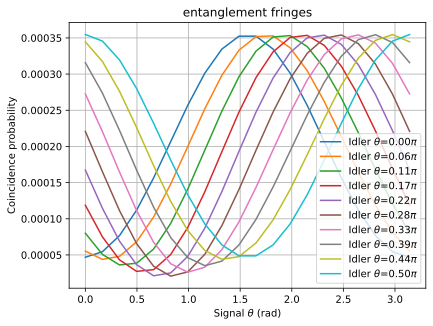

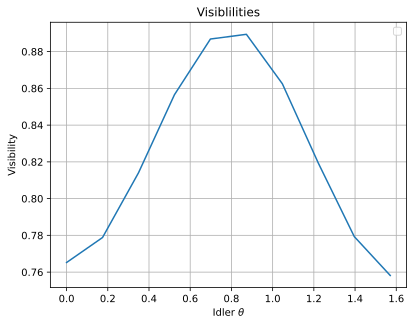

In [15]:
visibilities = []
for i in range(len(coincidence)):
    visibility = (max(coincidence[i]) - min(coincidence[i])) / (max(coincidence[i]) + min(coincidence[i]))
    visibilities.append(visibility)
    print(visibility, coincidence[i])

plt.figure()
plt.grid(True)
for i in range(len(idler_angles)):
    # print(fringe_real[i])
    plt.plot(signal_angles, coincidence[i], label=r'Idler $\theta$={:.2f}$\pi$'.format(idler_angles[i]/np.pi))
plt.title("entanglement fringes")
plt.ylabel("Coincidence probability")
plt.xlabel(r"Signal $\theta$ (rad)")    
plt.legend()

plt.figure()
plt.grid(True)
# for i in range(len(alpha_list)-1):
#     print(fringe_real[i])
plt.plot(idler_angles, visibilities)
plt.title("Visiblilities")
plt.ylabel("Visibility")
plt.xlabel(r"Idler $\theta$")    
plt.legend()

237.84472703933716


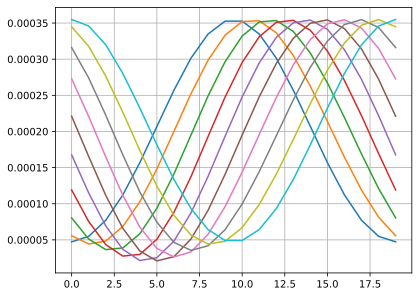

In [9]:
# params
trunc = 4
N = trunc+1
# mean_photon_num = 0.02
# num_modes = 8
# efficiency = 0.9
error_tolerance = 1e-15

mean_photon_num = np.sqrt(0.06)
num_modes = 8
efficiency = 0.9
initial_error_tolerance = 1e-15

# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# Include emission from other lightsource
start = time.time()
psi = extend_MPS(psi)

error_tolerance = 1e-15

# Perform Bell state measurement
psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, pnr = False, compress=True, contract=True)

# psi.draw()

# Rotate polarizers and perform measurements
# idler_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
idler_angles = np.linspace(0, np.pi/2, 10)
signal_angles = np.linspace(0, np.pi, 20)
# signal_angles = [0]
fix = {(f"L{j}",f"I{num_modes - i-1}"):(3*j,i+5) for j in range(10) for i in range(10)}
coincidence = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, compress=True, contract=True, draw = False)
print(time.time()-start)

plt.grid()
for i in range(len(idler_angles)):
    plt.plot((coincidence[i]), label = f"{i}")
# plt.legend()

### Statevector version

In [9]:
from numpy import kron
import scipy.sparse as sp

a = qt.destroy(N).full()
a = sp.csr_matrix(a)
a_dag = a.T

# Support functions:
def create_op(left_indices, op, right_indices):
    if left_indices == 0:
        return sp.kron(op, sp.eye(N**right_indices))
    elif right_indices == 0:
        return sp.kron(sp.eye(N**left_indices), op)
    else:    
        out_op = sp.kron(sp.eye(N**left_indices), op)
        return sp.kron(out_op, sp.eye(N**right_indices))
def _find_mat_exp(mat):
    ans = sp.eye(mat.shape[0])
    intermediate = 1
    for i in range(1, 50+1):
        intermediate *= mat/i
        intermediate.eliminate_zeros()
        ans += intermediate
    return ans 
def read_quantum_state_sparse(sparse_state, N):
    temp_sparse_state = sp.csr_matrix(sparse_state)
    temp_sparse_state.data = np.round(temp_sparse_state.data, 10)
    temp_sparse_state.eliminate_zeros()
    labels = generate_labels(4,N)
    state = temp_sparse_state.nonzero()[0]
    print(f"{len(state)} non-zero elements Corresponding Basis terms:")
    for k in state: print(labels[k],"-",k,"-",temp_sparse_state[k].data)

def extend_state_sparse(state):
    return sp.kron(state, state)
# TMSV_state_dense = extend_state_sparse(TMSV_state)

def bell_state_measurement_sparse(TMSV_state_dense, N, efficiency):
    # BSM BS implementation
    BSM_H_0_Mode_op = create_op(2, a_dag, 5)
    print(BSM_H_0_Mode_op.shape, len(BSM_H_0_Mode_op.nonzero()[0]), len(BSM_H_0_Mode_op.nonzero()[1]))
    BSM_V_0_Mode_op = create_op(3, a_dag, 4)
    BSM_H_1_Mode_op = create_op(6, a_dag, 1)
    BSM_V_1_Mode_op = create_op(7, a_dag, 0)
    hamiltonian_BS_H = -np.pi/4 * ( BSM_H_0_Mode_op.T@BSM_H_1_Mode_op - BSM_H_0_Mode_op@BSM_H_1_Mode_op.T )
    unitary_BS_H = _find_mat_exp(hamiltonian_BS_H)

    hamiltonian_BS_V = -np.pi/4 * ( BSM_V_0_Mode_op.T@BSM_V_1_Mode_op - BSM_V_0_Mode_op@BSM_V_1_Mode_op.T )
    unitary_BS_V = _find_mat_exp(hamiltonian_BS_V)


    # BSM povm implementation
    povm_op_1 = sp.csr_matrix(create_POVM_OP_Dense(efficiency, 1, N))
    povm_op_0 = sp.csr_matrix(create_POVM_OP_Dense(efficiency, 0, N))

    BSM_povm = create_op(2, povm_op_1, 0)
    BSM_povm = create_op(0, sp.kron(BSM_povm, povm_op_0), 2)
    BSM_povm = sp.kron(BSM_povm, sp.kron(povm_op_0, povm_op_1))

    # print(unitary_BS_V.shape, unitary_BS_H.shape, TMSV_state_dense.shape)
    
    post_BS_State = unitary_BS_V @ unitary_BS_H @ TMSV_state_dense
    post_BSM_State = BSM_povm @ post_BS_State

    return post_BSM_State
# post_BSM_State = bell_state_measurement_sparse(TMSV_state_dense, N, efficiency)

def rotate_and_measure_sparse(post_BSM_State, N, efficiency):
    # Polarization rotators mode operators
    rotator_H_0_Mode_op = create_op(0, a_dag, 7)
    rotator_V_0_Mode_op = create_op(1, a_dag, 6)
    rotator_H_1_Mode_op = create_op(4, a_dag, 3)
    rotator_V_1_Mode_op = create_op(5, a_dag, 2)

    povm_op_1 = sp.csr_matrix(create_POVM_OP_Dense(efficiency, 1, N))

    # polarization analysis detector POVMs
    pol_analyzer_povm = create_op(0, povm_op_1, 3)
    pol_analyzer_povm = create_op(0, sp.kron(pol_analyzer_povm, povm_op_1), 3)

    # Applying rotations and measuring

    signal_angles = np.linspace(0, np.pi, 10)
    # idler_angles = np.linspace(0, np.pi, 20)
    idler_angles = [0]
    coincidence = []

    for i, idler_angle in enumerate(idler_angles):
        coincidence_probs = []

        hamiltonian_rotator_1 = -idler_angle * ( rotator_H_1_Mode_op.T@rotator_V_1_Mode_op - rotator_H_1_Mode_op@rotator_V_1_Mode_op.T )
        unitary_rotator_1 = _find_mat_exp(hamiltonian_rotator_1)
        post_idler_detection_state = unitary_rotator_1 @ post_BSM_State
        # post_idler_detection_state = post_BSM_State
        
        for j, angle in enumerate(signal_angles):
            # print("idler:", i, "signal:", j)
        
            hamiltonian_rotator_0 = -angle * ( rotator_H_0_Mode_op.T@rotator_V_0_Mode_op - rotator_H_0_Mode_op@rotator_V_0_Mode_op.T )
            unitary_rotator_0 = _find_mat_exp(hamiltonian_rotator_0)
            post_rotations_state = unitary_rotator_0 @ post_idler_detection_state

            measured_state = pol_analyzer_povm @ post_rotations_state

            coincidence_probs.append(sp.linalg.norm(measured_state)**2)
        coincidence.append(coincidence_probs)
    return coincidence, idler_angles
# coincidence, idler_angles = rotate_and_measure_sparse(post_BSM_State, N, efficiency)

done with extension
(65536, 65536) 49152 49152
done with bell_state_measurement_sparse
done with rotate_and_measure_sparse


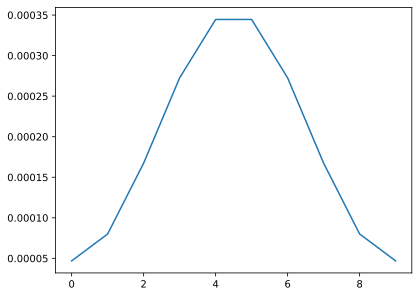

In [10]:
# read_quantum_state_sparse(TMSV_state, N)

TMSV_state_dense = extend_state_sparse(TMSV_state)
print("done with extension")
# read_quantum_state_sparse(TMSV_state_dense, N)
post_BSM_State = bell_state_measurement_sparse(TMSV_state_dense, N, efficiency)
print("done with bell_state_measurement_sparse")

# state_indices, _ = post_BSM_State.nonzero()
# num_photons = 2
# for n in state_indices:
#     for i in range(num_photons):
#         H = (n // (N**(2*i+1))) % N
#         V = (n // (N**(2*i+0))) % N
#         # print("n:", n, "H:", H, "V:", V, "i", i, "Val:", entangled_state[n,0])
#         if H+V > trunc:
#             # print("deleted:", n)
#             post_BSM_State[n,0] = 0  

# read_quantum_state_sparse(post_BSM_State, N) 

# read_quantum_state_sparse(post_BSM_State, N)
coincidence, idler_angles = rotate_and_measure_sparse(post_BSM_State, N, efficiency)
print("done with rotate_and_measure_sparse")

for i in range(len(idler_angles)):
    plt.plot((coincidence[i]), label = f"{i}")
# plt.legend()

Performance comparisons

In [11]:
# params
mean_photon_num = 0.2
num_modes = 8
efficiency = 0.9
initial_error_tolerance = 1e-15
truncations = [1,2,3,4,5,6]
error_tolerances = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
TN_data = []
sparse_data = []

num_iter = 5

for error_tolerance in error_tolerances:
    TN_data_error_tol = []
    for trunc in truncations:
        N = trunc+1
        vacuum = create_vacuum_state(num_modes=num_modes, N=N)
        
        time_taken = 0
        for iter in range(num_iter):
            psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, initial_error_tolerance)
            # TN data:
            start = time.time()
            psi = extend_MPS(psi)
            psi = bell_state_measurement(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance)
            idler_angles = [0]
            coincidence = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles)
            time_taken += time.time() - start
        
        TN_data_error_tol.append(time_taken/num_iter)
        
        print("truncation:", trunc)
    print("error:", error_tolerance)
    TN_data.append(TN_data_error_tol)

truncation: 1
truncation: 2
truncation: 3
truncation: 4
truncation: 5
truncation: 6
error: 1e-05
truncation: 1
truncation: 2
truncation: 3
truncation: 4
truncation: 5
truncation: 6
error: 1e-06
truncation: 1
truncation: 2
truncation: 3
truncation: 4
truncation: 5
truncation: 6
error: 1e-07
truncation: 1
truncation: 2
truncation: 3
truncation: 4
truncation: 5
truncation: 6
error: 1e-08
truncation: 1
truncation: 2
truncation: 3
truncation: 4
truncation: 5
truncation: 6
error: 1e-09
truncation: 1
truncation: 2
truncation: 3
truncation: 4
truncation: 5
truncation: 6
error: 1e-10


In [12]:
corrected_TN_data = []
for i in TN_data[:6]:
    corrected_TN_data.append([2*j for j in i])
corrected_TN_data

[[0.37795286178588866,
  0.49544363021850585,
  1.160251522064209,
  1.8715259552001953,
  3.6817642211914063,
  6.2446390151977536],
 [0.37921533584594724,
  0.5582192420959473,
  2.207474422454834,
  4.248854732513427,
  5.60923137664795,
  8.473978233337402],
 [0.3784365653991699,
  0.5515198707580566,
  2.335206699371338,
  5.527664089202881,
  8.341994571685792,
  12.478046989440918],
 [0.37646961212158203,
  0.7961133003234864,
  6.180577373504638,
  9.55179042816162,
  14.224153995513916,
  19.299321365356445],
 [0.39735660552978513,
  0.9513609886169434,
  5.009572887420655,
  10.528872203826904,
  15.55453701019287,
  22.058192825317384],
 [0.38264780044555663,
  0.9167355537414551,
  8.105130481719971,
  14.237593746185302,
  23.17667531967163,
  33.90475454330444]]

[0.37795286178588866, 0.49544363021850585, 1.160251522064209, 1.8715259552001953, 3.6817642211914063, 6.2446390151977536] 1e-05
[0.37921533584594724, 0.5582192420959473, 2.207474422454834, 4.248854732513427, 5.60923137664795, 8.473978233337402] 1e-06
[0.3784365653991699, 0.5515198707580566, 2.335206699371338, 5.527664089202881, 8.341994571685792, 12.478046989440918] 1e-07
[0.37646961212158203, 0.7961133003234864, 6.180577373504638, 9.55179042816162, 14.224153995513916, 19.299321365356445] 1e-08
[0.39735660552978513, 0.9513609886169434, 5.009572887420655, 10.528872203826904, 15.55453701019287, 22.058192825317384] 1e-09
[0.38264780044555663, 0.9167355537414551, 8.105130481719971, 14.237593746185302, 23.17667531967163, 33.90475454330444] 1e-10


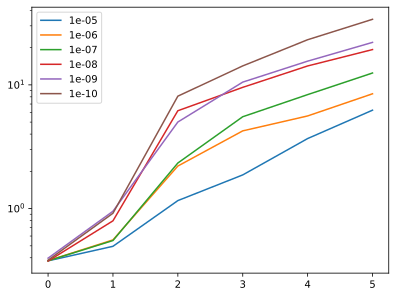

In [13]:

for i in range(len(corrected_TN_data)):
    plt.plot(corrected_TN_data[i], label=f"{error_tolerances[i]}")
    print(corrected_TN_data[i], error_tolerances[i])
plt.legend()
plt.yscale('log')


In [ ]:
sparse_data = []
num_iter = 2
for trunc in truncations:

    a = qt.destroy(trunc+1).full()
    a = sp.csr_matrix(a)
    a_dag = a.T
    
    time_taken = 0
    for iter in range(num_iter):
        N = trunc+1
        vacuum = create_vacuum_state(num_modes=num_modes, N=N)
        
        psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, initial_error_tolerance)

        start = time.time()
        # Sparse matrix data:
        TMSV_state_dense = extend_state_sparse(TMSV_state)
        post_BSM_State = bell_state_measurement_sparse(TMSV_state_dense, N, efficiency)
        coincidence, idler_angles = rotate_and_measure_sparse(post_BSM_State, N, efficiency)

        time_taken += time.time() - start
        print("iter:", iter)

    sparse_data.append(time_taken/num_iter)
    print(trunc)



(256, 256) 128 128
iter: 0
(256, 256) 128 128
iter: 1
1
(6561, 6561) 4374 4374
iter: 0
(6561, 6561) 4374 4374
iter: 1
2
(65536, 65536) 49152 49152
iter: 0
(65536, 65536) 49152 49152
iter: 1
3
(390625, 390625) 312500 312500
iter: 0
(390625, 390625) 312500 312500
iter: 1
4
(1679616, 1679616) 1399680 1399680


{1e-05: [0.09655718803405762, 0.7302299022674561, 14.933477115631103, 46.71982793807983, 84.28161706924439, 70.73001379966736], 1e-06: [0.09655718803405762, 0.7302299022674561, 14.933477115631103, 46.71982793807983, 84.28161706924439, 70.73001379966736], 1e-07: [0.09655718803405762, 0.7302299022674561, 14.933477115631103, 46.71982793807983, 84.28161706924439, 70.73001379966736], 1e-08: [0.09655718803405762, 0.7302299022674561, 14.933477115631103, 46.71982793807983, 84.28161706924439, 70.73001379966736], 1e-09: [0.09655718803405762, 0.7302299022674561, 14.933477115631103, 46.71982793807983, 84.28161706924439, 70.73001379966736], 1e-10: [0.09655718803405762, 0.7302299022674561, 14.933477115631103, 46.71982793807983, 84.28161706924439, 70.73001379966736]}


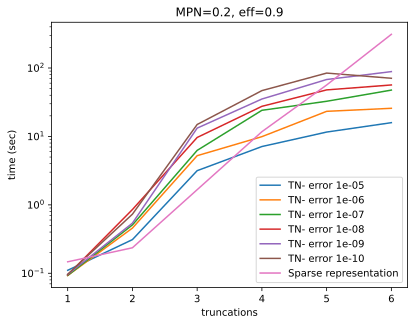

In [ ]:
import json
for i in range(len(corrected_TN_data)):
    plt.plot(truncations, corrected_TN_data[i], label=f"TN- error {error_tolerances[i]}")
plt.plot(truncations, sparse_data, label="Sparse representation")
plt.legend()
plt.yscale('log')
plt.ylabel("time (sec)")
plt.xlabel("truncations")
plt.title("MPN=0.2, eff=0.9")

time_dict_TN = {err:times for err in error_tolerances for times in corrected_TN_data}
time_sparse = sparse_data
truncations = truncations
print(time_dict_TN)

json_file = open("projects/swapping/timing_analysis/TN_data_mpn02.json", "a+")
# json.dump(time_dict_TN, json_file)
sparse_data_file = open("projects/swapping/timing_analysis/sparse_data_mpn02.txt", "a+")
np.savetxt(sparse_data_file, time_sparse)
# truncations_file = open("projects/swapping/timing_analysis/truncations.txt", "a+")
# np.savetxt(truncations_file, truncations)

In [ ]:
print()

### Create density matrix

In [ ]:
psi_H = psi.H
# psi_H.retag_({'I{}': 'Out{}'})
psi_H.site_ind_id = 'b{}'
psi_H.combine(psi)
rho = (psi_H | psi)

for i in range(rho.L):
    rho ^= f"I{i}"
    
rho = rho.fuse_multibonds()   
rho = mpo(rho.arrays)
rho.compress(cutoff = 1e-5)

rho